<a href="https://colab.research.google.com/github/PKohli876/Machine-Learning---Time-Series-project/blob/main/Time_Series_ML_Intermediate_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%time
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling     

!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade statsmodels 

     |████████████████████████████████| 71kB 3.5MB/s 
     |████████████████████████████████| 256kB 4.0MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 3.1MB 6.6MB/s 
     |████████████████████████████████| 1.1MB 31.8MB/s 
     |████████████████████████████████| 10.1MB 40.8MB/s 
     |████████████████████████████████| 112kB 45.9MB/s 
     |████████████████████████████████| 81kB 9.7MB/s 
     |████████████████████████████████| 645kB 34.4MB/s 
     |████████████████████████████████| 296kB 33.8MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
     |████████████████████████████████| 9.5MB 4.0MB/s 
CPU times: user 262 ms, sys: 57.3 ms, total: 319 ms
Wall time: 30.2 s


In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
from datetime import datetime                                       # Importing datetime for datetime manipulation
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from statsmodels.tsa.seasonal import seasonal_decompose             # Seasonal decomposition using moving averages
from statsmodels.tsa.stattools import adfuller                      # Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import acf, pacf                     # Importing Autocorrelation and Partial Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf                  # To plot Autocorrelation Function
from statsmodels.graphics.tsaplots import plot_pacf                 # To plot Partial Autocorrelation Function
#-------------------------------------------------------------------------------------------------------------------------------
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [3]:
# import data
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv')
# Review data
print('Data Shape:', data.shape)
data.head()

Data Shape: (365, 2)


,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
# Review metadata
print('Described Column Length:', len(data.describe().columns))
data.describe().transpose()


Described Column Length: 1


,count,mean,std,min,25%,50%,75%,max
Births,365.00000,41.98082,7.34826,23.00000,37.00000,42.00000,46.00000,73.00000


In [5]:
data.info(verbose=True, memory_usage='deep', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 26.9 KB


No Null values. Date object needs to be converted to datetime

In [6]:
# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    365 non-null    datetime64[ns]
 1   Births  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB
None


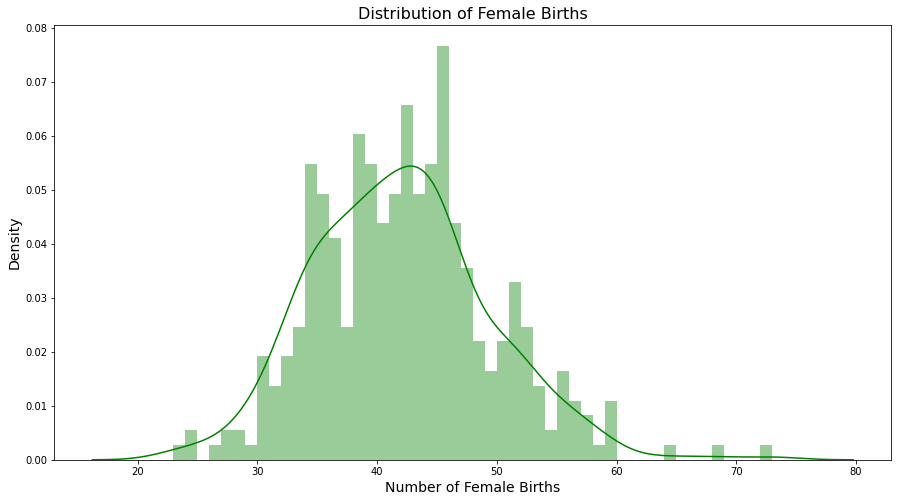

In [7]:
# Created a new figure of 15 X 8 inches
fig = plt.figure(figsize=[15, 8])
sns.distplot(a=data['Births'], bins=50, color='green')
plt.title(label='Distribution of Female Births', size=16)
plt.xlabel(xlabel='Number of Female Births', size=14)
plt.ylabel(ylabel='Density', size=14)
plt.show()

Distribution can be considered normal


Time Series Analysis
Time series deals with two columns, i.e. temporal (predictor) and forecast (prediction).

Temporal: The time which in our case is Month.

Forecast: The number of female births 

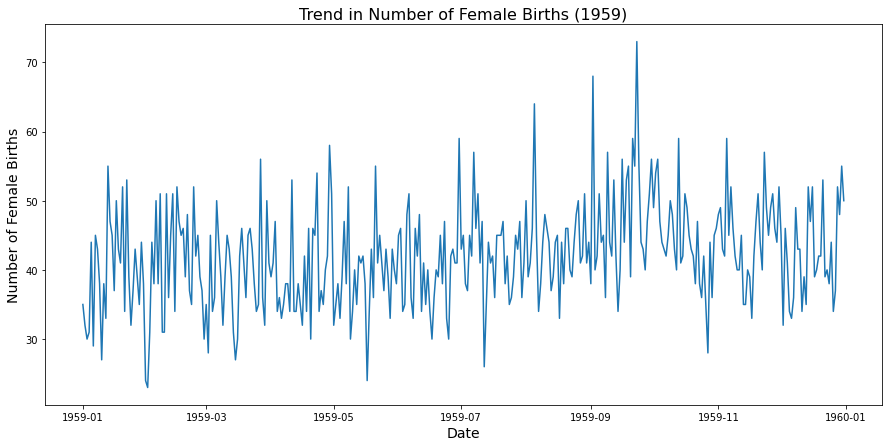

In [8]:
fig = plt.figure(figsize=[15, 7])
sns.lineplot(x='Date', y='Births', data=data)
plt.xlabel(xlabel='Date', size=14)
plt.ylabel(ylabel='Number of Female Births', size=14)
plt.title(label='Trend in Number of Female Births (1959)', size=16)
plt.show()

Decomposition Of Time Series
It is referred as decomposition of a time series into following components:

Seasonal Component,
Trend Component,
Cyclic Component and,
Irregular or Reisdual Component
These componentst are plotted separately.

The cyclical component (if present in the data) is included in the "trend" component plot.

Success!


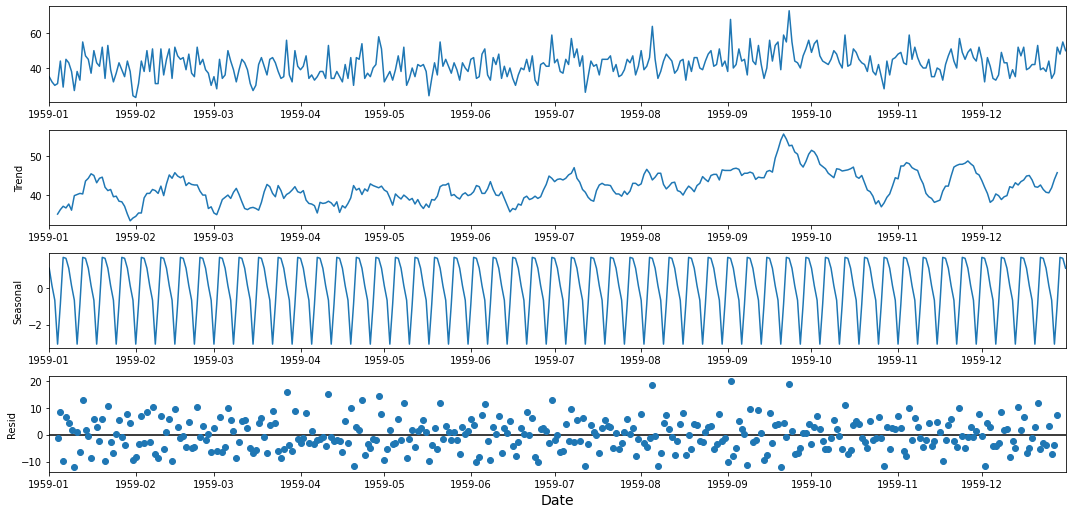

In [9]:
indexed_data =  data.set_index(['Date'])
print('Success!')
# Set figsize of 15 X 7 inches
rcParams['figure.figsize']  =  [15, 7]

# Decomposed data into respective components: Observed, Trend, Seasonal and Residual
seasonal_decompose(x=indexed_data, model='additive', extrapolate_trend=0).plot()
plt.xlabel(xlabel='Date', size = 14)
plt.show()

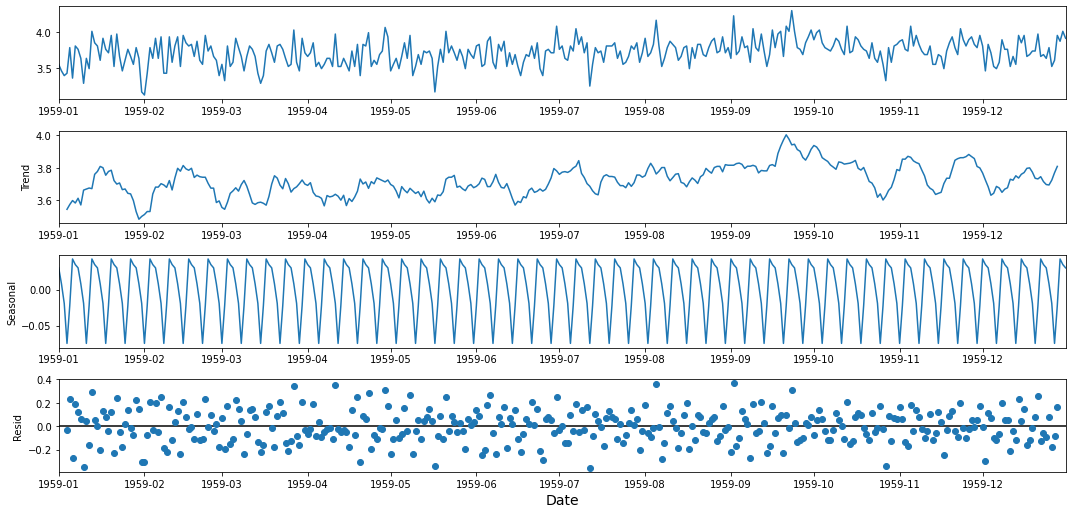

In [10]:
# Applied Log Transformation
log_indexed_data = np.log(indexed_data)
seasonal_decompose(x=log_indexed_data, model='additive', extrapolate_trend=0).plot()
# seasonal_decompose(x=indexed_data, model='multiplicative', extrapolate_trend=0).plot() will yield same results
# but we will need two versions of data additive and multiplicatve for checking stationary test of ADF. Whichveer decomposition yields 
# staionary results, will be used
plt.xlabel(xlabel='Date', size = 14)
plt.show()

Define Functions for stationary checks:
1. Constant Mean
2. Constant variance
3. Auto-corelation is independenct of time

In [11]:
# Function rolling means : To check and view mean and variance visually
def rolling_means(data, dataColumn, title_add = ''):

  # Average rolling mean over 12 months over the entire data set
  roll_mean = data.rolling(window=12).mean()

  # Plotting Rolling Statistics over Observed Data
  roll_std = data.rolling(window=12).std()

  sns.lineplot(x=data.index, y=dataColumn, data=data)
  sns.lineplot(x=roll_mean.index, y=dataColumn, data=roll_mean)
  sns.lineplot(x=roll_std.index, y=dataColumn, data=roll_std)

  plt.legend(labels=['Observed', 'Rolling Mean', 'Rolling Std'], loc='best', prop = {'size': 14})
  plt.xlabel(xlabel='Month', size=14)
  plt.ylabel(ylabel='Number of Female Births', size=14)
  plt.title(label='Rolling Statistics (μ & σ)' + title_add, size=16)

# Function Augumented Dicky-Fuller Test  : To evaluate Hypotheses accpetance/rejection with 1,5,10% confidences
def ADFTest(data, dataColumn, test_label='Original'):

  # Saved test results from adfuller function
  dftest = adfuller(data[dataColumn], autolag='AIC')

  # Extracted respective values from the saved test results
  df_dict = {'ADF_Test_Statistics': dftest[0], 'p-value': dftest[1], 'Used_Lags': dftest[2], 
              'Number_Of_Observations': dftest[3], 'Critical_Value (1%)': dftest[4]['1%'],
            'Critical_Value (5%)': dftest[4]['5%'], 'Critical_Value (10%)': dftest[4]['10%']}

  # Created dataframe out of the dictionary
  dfoutput = pd.DataFrame(data=df_dict, index=[test_label])

  return dfoutput

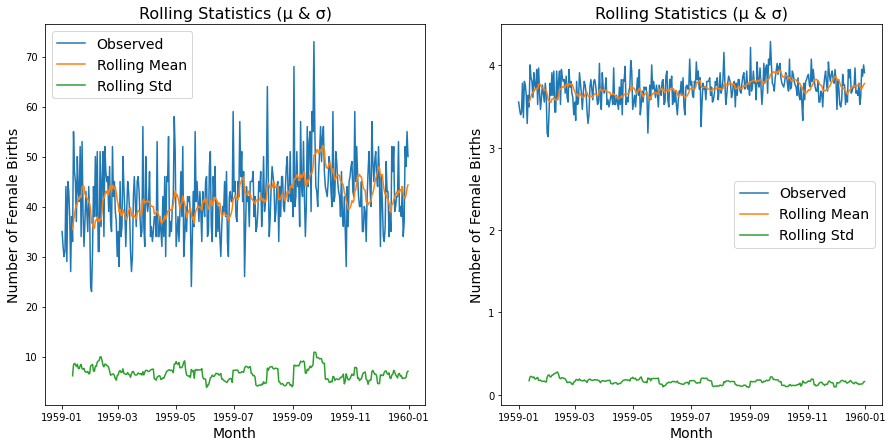

In [12]:
# Plotting Rolling Statistics over Observed Data for logindexed data
figure = plt.figure(figsize=[15, 7])
plt.subplot(1, 2, 1)

# Called the function
rolling_means(indexed_data, 'Births')

plt.subplot(1, 2, 2)

rolling_means(log_indexed_data, 'Births')

# Plot the Visual
plt.show()

In [13]:
d1 = ADFTest(indexed_data,'Births')
d2 = ADFTest(log_indexed_data,'Births','Log Data')
motaData = pd.concat([d1, d2])
motaData



,ADF_Test_Statistics,p-value,Used_Lags,Number_Of_Observations,Critical_Value (1%),Critical_Value (5%),Critical_Value (10%)
Original,-4.80829,0.00005,6,358,-3.44875,-2.86965,-2.57109
Log Data,-4.35317,0.00036,7,357,-3.44880,-2.86967,-2.57110


Observations:

From the above graphs (original, log transformed) it is clearly visible that rolling mean is stationary and original is better than log tarnsformed.

Test statistics is lesser than CV of 1% and p-value is lesser than .05 indicating that we can say with more than 99% confidence that the data is stationary..

However, we would perform more transformations like Scaled Moving Average to study effect of various models on ADF statistics models.

We will abandon log_indexed_data from now on it is indicative that the time series is closer to additive nature than multiplicative. For any other transformations, indexed_data will be used



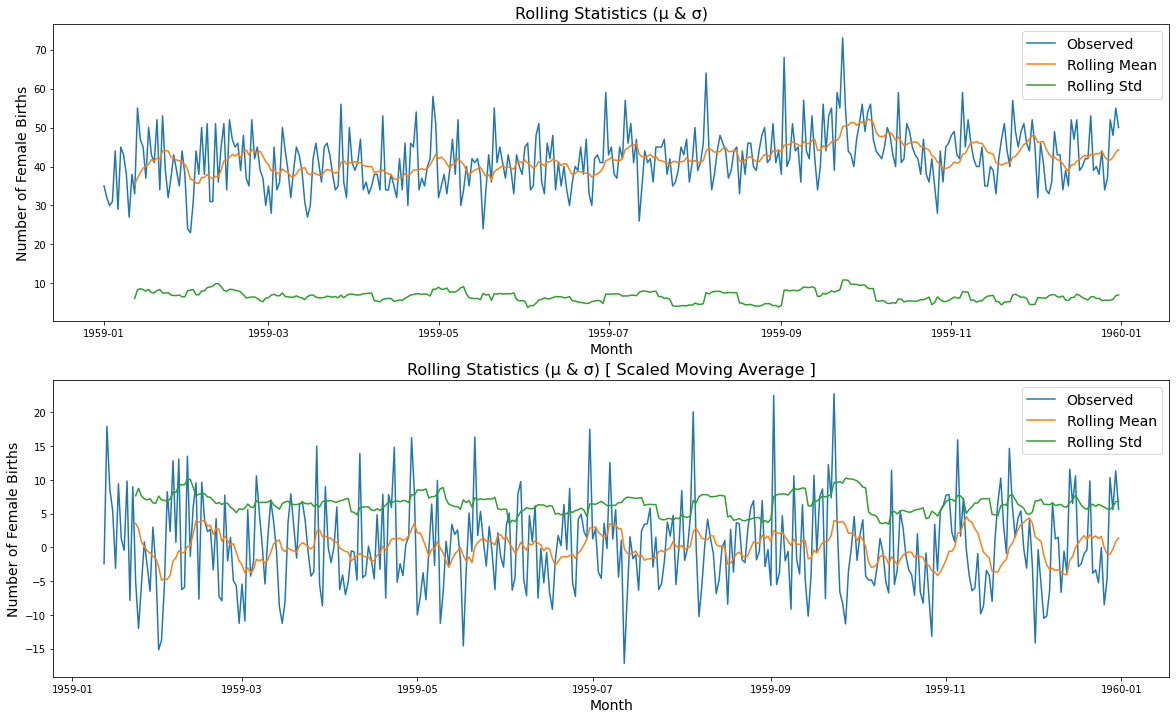

In [14]:
# Scaled Moving Avergae Data
moving_average_indexed_data = indexed_data.rolling(window=12).mean()
scaled_moving_average = indexed_data - moving_average_indexed_data

# Remove NAN values
scaled_moving_average.dropna(inplace=True)

figure = plt.figure(figsize=[20, 12])

# Plot With Scaled Moving Average
# Plot the Visual
plt.subplot(2, 1, 1)

# Called the function
rolling_means(indexed_data, 'Births')

plt.subplot(2, 1, 2)

rolling_means(scaled_moving_average, 'Births', title_add=' [ Scaled Moving Average ]')

# Plot the Visual
plt.show()

# Display top 12 data pointsscaled_moving_average.head(12).transpose()

In [15]:
d_movingaverage = ADFTest(scaled_moving_average,'Births', 'Moving Average')
motaData = pd.concat([motaData, d_movingaverage])
motaData

,ADF_Test_Statistics,p-value,Used_Lags,Number_Of_Observations,Critical_Value (1%),Critical_Value (5%),Critical_Value (10%)
Original,-4.80829,0.00005,6,358,-3.44875,-2.86965,-2.57109
Log Data,-4.35317,0.00036,7,357,-3.44880,-2.86967,-2.57110
Moving Average,-7.82270,0.00000,12,341,-3.44967,-2.87005,-2.57131


We can see that moving average has imporved the statistics further and p value has decreased to 0. We will keep on evaluating more methods and choose the one with least ADF_Test_Statistics

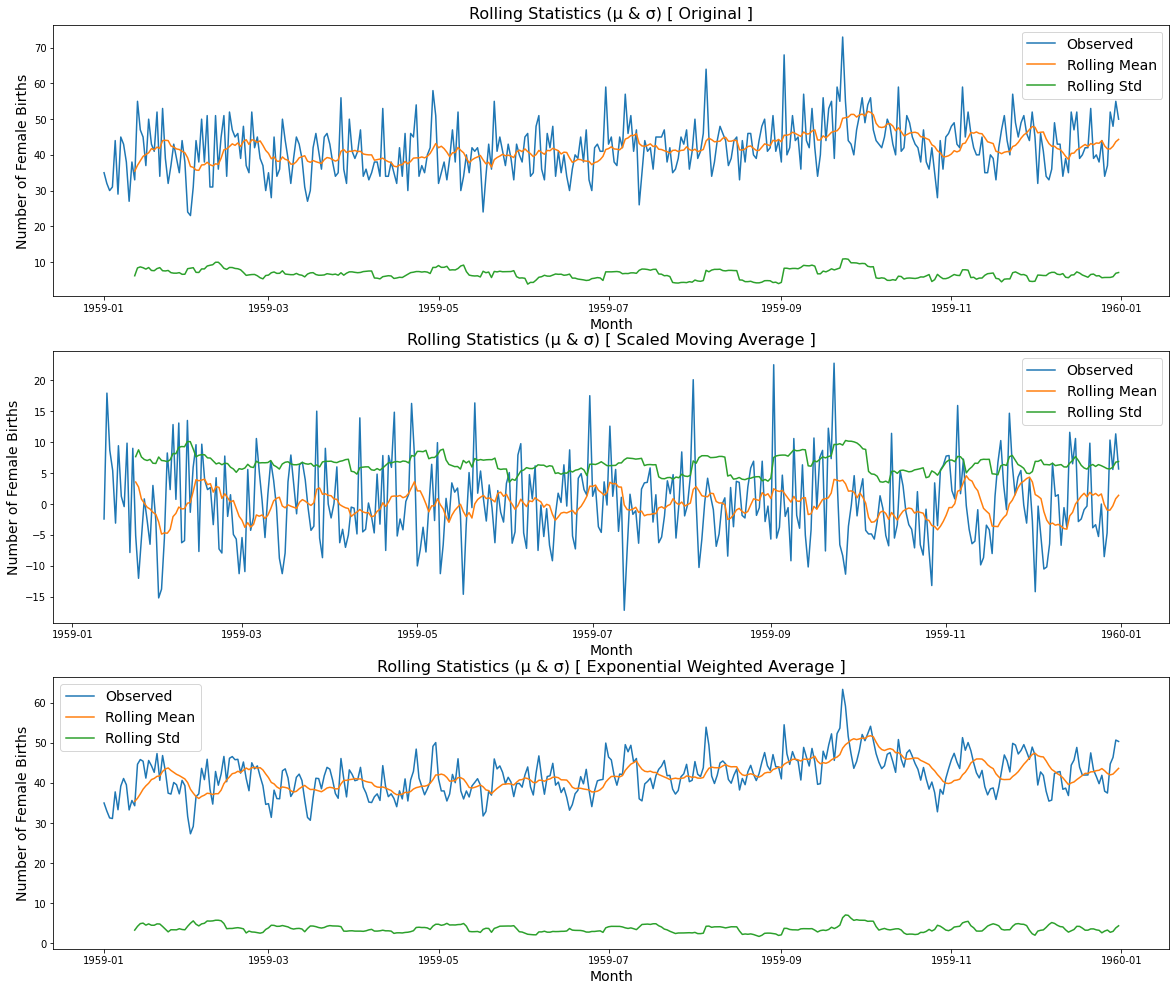

In [16]:
# Plotting Rolling Statistics over Observed Data
figure = plt.figure(figsize = [20, 17])

plt.subplot(3, 1, 1)

# Plot Without Transformation
rolling_means(indexed_data, 'Births',title_add = ' [ Original ]')

plt.subplot(3, 1, 2)

rolling_means(scaled_moving_average, 'Births', title_add=' [ Scaled Moving Average ]')


plt.subplot(3, 1, 3)

# Apply Exponential Weight Transformation
exp_weighted_avg_indexed_data = indexed_data.ewm(alpha = 0.5, min_periods = 0, adjust = True).mean()

# Plot With Log Transformation
rolling_means(exp_weighted_avg_indexed_data,'Births', title_add = ' [ Exponential Weighted Average ]')

# Plot the Visual
plt.show()

# Display top 12 data points
#exp_weighted_avg_indexed_data.head(12).transpose()

In [17]:
d_exp_weighted_avg = ADFTest(exp_weighted_avg_indexed_data,'Births', 'Exponential Moving Average')
motaData = pd.concat([motaData, d_exp_weighted_avg])
motaData

,ADF_Test_Statistics,p-value,Used_Lags,Number_Of_Observations,Critical_Value (1%),Critical_Value (5%),Critical_Value (10%)
Original,-4.80829,0.00005,6,358,-3.44875,-2.86965,-2.57109
Log Data,-4.35317,0.00036,7,357,-3.44880,-2.86967,-2.57110
Moving Average,-7.82270,0.00000,12,341,-3.44967,-2.87005,-2.57131
Exponential Moving Average,-8.02285,0.00000,0,364,-3.44844,-2.86951,-2.57102


We can see that exp moving average has imporved Test stats further.


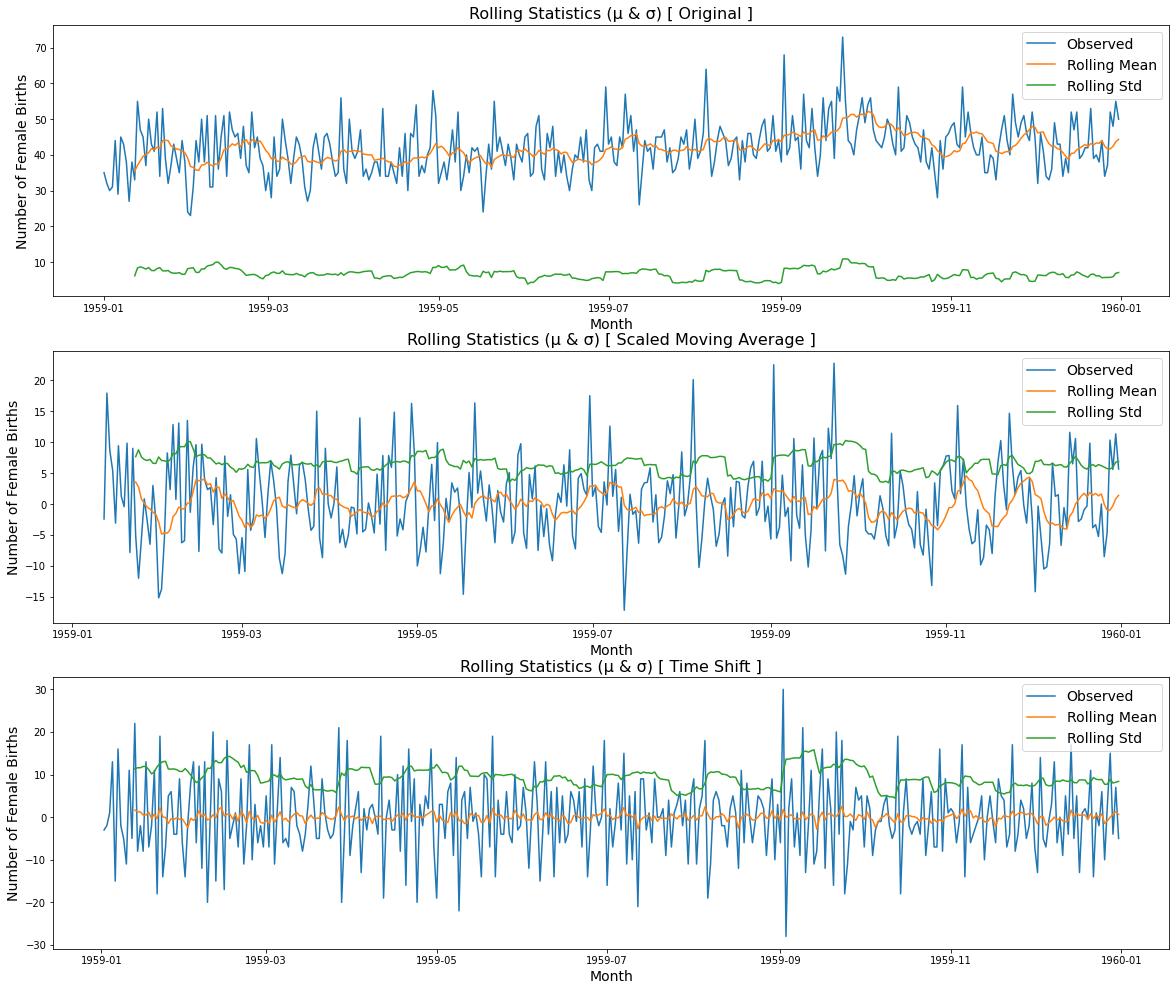

In [18]:
# Plotting Rolling Statistics over Observed Data
figure = plt.figure(figsize = [20, 17])

plt.subplot(3, 1, 1)

# Plot Without Transformation
rolling_means(indexed_data, 'Births',title_add = ' [ Original ]')

plt.subplot(3, 1, 2)

rolling_means(scaled_moving_average, 'Births', title_add=' [ Scaled Moving Average ]')


plt.subplot(3, 1, 3)
# Apply Log Scaled Moving Average Transformation
shift_indexed_data  =  indexed_data - indexed_data.shift(periods = 1)

# Remove NAN values
shift_indexed_data.dropna(inplace = True)

# Plot With Time Shift Transformation
rolling_means(shift_indexed_data,'Births', title_add = ' [ Time Shift ]')

# Plot the Visual
plt.show()


In [19]:
d_time_shift_avg = ADFTest(shift_indexed_data,'Births', 'Time Shift')
motaData = pd.concat([motaData, d_time_shift_avg])
motaData


,ADF_Test_Statistics,p-value,Used_Lags,Number_Of_Observations,Critical_Value (1%),Critical_Value (5%),Critical_Value (10%)
Original,-4.80829,0.00005,6,358,-3.44875,-2.86965,-2.57109
Log Data,-4.35317,0.00036,7,357,-3.44880,-2.86967,-2.57110
Moving Average,-7.82270,0.00000,12,341,-3.44967,-2.87005,-2.57131
Exponential Moving Average,-8.02285,0.00000,0,364,-3.44844,-2.86951,-2.57102
Time Shift,-12.62518,0.00000,6,357,-3.44880,-2.86967,-2.57110


WIth time shift, we can ascertain that our data is stationary . We will now proceed to calculate Suto correeation and partial Auto-corelation functions

In [20]:
# Estimating Autocorrelation Function
ACF = acf(shift_indexed_data, nlags=20)

# Estimating Partial Autocorrelation Function
PACF = pacf(shift_indexed_data, nlags=20)

# Preparing a dataframe out of Correlation Arrays
corrFrame = pd.DataFrame(data = {'ACF': ACF, 'PACF': PACF})
corrFrame

,ACF,PACF
0,1.00000,1.00000
1,-0.46261,-0.46388
2,-0.01128,-0.28864
3,-0.01823,-0.22109
4,-0.00775,-0.18609
5,0.00391,-0.15282
6,-0.06883,-0.23772
7,0.10240,-0.11944
8,0.01503,-0.02636
9,-0.04497,-0.04360


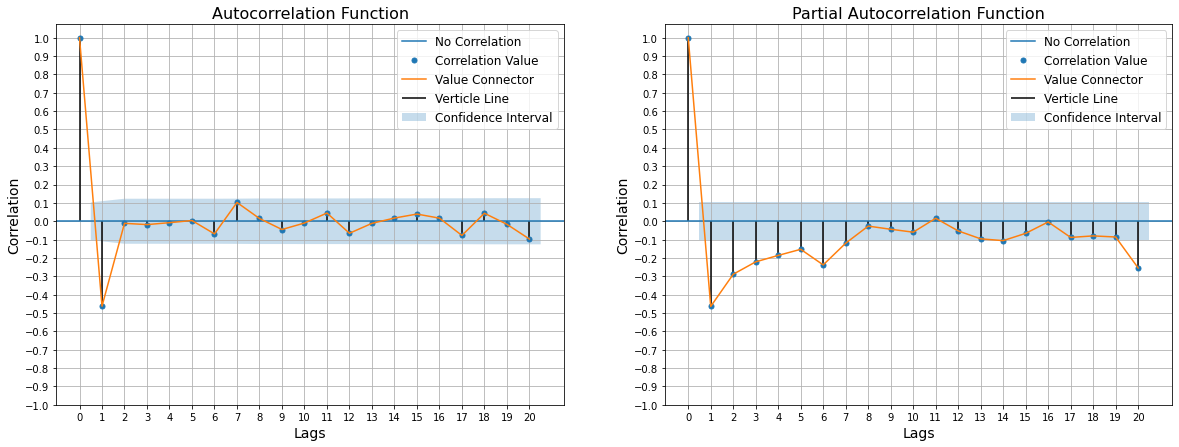

In [21]:
fig, (axes1, axes2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(20, 7))

plot_acf(shift_indexed_data, lags=20, ax=axes1)
sns.lineplot(x=corrFrame.index, y='ACF', data=corrFrame, ax=axes1)
axes1.set_xlabel(xlabel='Lags', size=14)
axes1.set_ylabel(ylabel='Correlation', size=14)
axes1.set_title(label='Autocorrelation Function', size=16)
axes1.legend(labels=['No Correlation', 'Correlation Value', 'Value Connector','Verticle Line', 'Confidence Interval'], prop={'size': 12})
axes1.set_xticks(ticks=range(0, 21, 1))
axes1.set_yticks(ticks=np.linspace(start=-1, stop=1, num=21))
axes1.grid(b=True, which='both')

plot_pacf(shift_indexed_data, lags=20, ax=axes2)
sns.lineplot(x=corrFrame.index, y='PACF', data=corrFrame, ax=axes2)
axes2.set_xlabel(xlabel='Lags', size=14)
axes2.set_ylabel(ylabel='Correlation', size=14)
axes2.set_title(label='Partial Autocorrelation Function', size=16)
axes2.legend(labels=['No Correlation', 'Correlation Value', 'Value Connector', 'Verticle Line', 'Confidence Interval'], prop={'size': 12})
axes2.set_xticks(ticks=range(0, 21, 1))
axes2.set_yticks(ticks=np.linspace(start=-1, stop=1, num=21))
axes2.grid(b=True, which='both')

plt.show()

Observation:

ACF Graph: Shows Value Connector is touching the baseline with Lags being close to 1.

Thus, value for  q  = 1.
PACF Graph: Shows Value Connector is touching the baseline with Lags being close to 1.

Thus, value for  p  = 1.

In [66]:
len(exp_weighted_avg_indexed_data)*.2

73.0

In [67]:
train = exp_weighted_avg_indexed_data[0 : len(exp_weighted_avg_indexed_data) - 73]

test = exp_weighted_avg_indexed_data[len(exp_weighted_avg_indexed_data) - 73 : ]

print('Train Shape:', train.shape)
print('Test Shape:', test.shape)

Train Shape: (292, 1)
Test Shape: (73, 1)


In [68]:
def actual_vs_predicted(actual_data, predicted_data, title):

  # Plotting Actual Data
  sns.lineplot(x=actual_data.index, y=actual_data.values.flatten())
  sns.scatterplot(x=actual_data.index, y=actual_data.values.flatten())

  # Plotting Predicted Data
  sns.lineplot(x=predicted_data.index, y=predicted_data.values)
  sns.scatterplot(x=predicted_data.index, y=predicted_data.values)

  # Estimating RSS
  rss_value = np.sum(np.square(actual_data.values - predicted_data.values))

  # Modifying formatting
  plt.xlabel(xlabel='Month', size=14)
  plt.ylabel(ylabel='Number of Births', size=14)
  plt.title(label=title +' [RSS = {:.4f}]'.format(rss_value), size=16)
  plt.legend(labels=['Actual', 'Predicted'])
  plt.grid(b=True, which='both')

In [69]:
#ARMA
model = ARIMA(train, order=(1, 0, 1)) # p=1, d=0, q=1
model_fit = model.fit()
predicted = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)
print('-----------------------------------------------------------------------')
print('Coefficients:')
print(model_fit.params)
print('-----------------------------------------------------------------------')

-----------------------------------------------------------------------
Coefficients:
const    41.65112
ar.L1     0.72460
ma.L1    -0.06396
sigma2   13.30289
dtype: float64
-----------------------------------------------------------------------


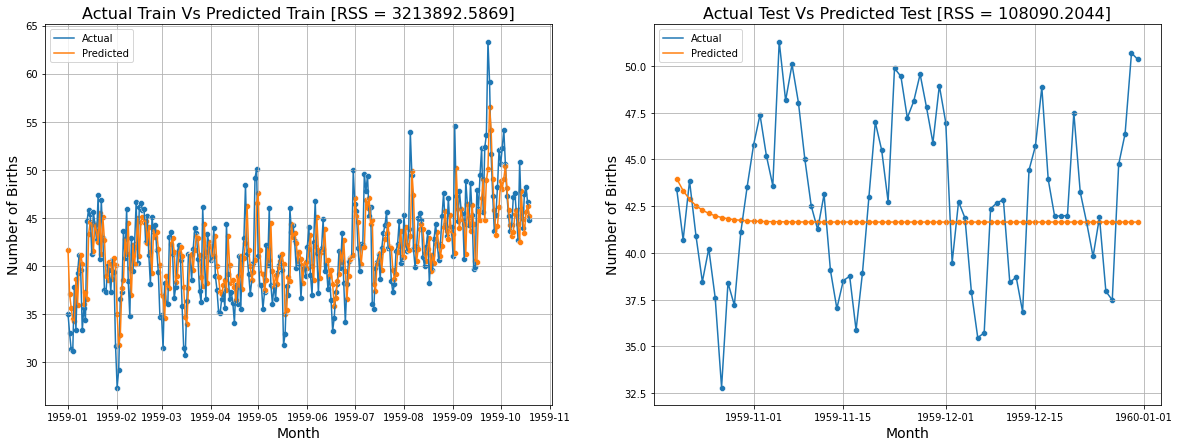

In [70]:
figure = plt.figure(figsize=[20, 7])

plt.subplot(1, 2, 1)
actual_vs_predicted(train, model_fit.fittedvalues, title='Actual Train Vs Predicted Train')

plt.subplot(1, 2, 2)
actual_vs_predicted(test, predicted, title='Actual Test Vs Predicted Test')

plt.show()

In [71]:
#AR
model = ARIMA(train, order=(1, 0, 0)) # p=1, d=0, q=0
model_fit = model.fit()
predicted = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)
print('-----------------------------------------------------------------------')
print('Coefficients:')
print(model_fit.params)
print('-----------------------------------------------------------------------')

-----------------------------------------------------------------------
Coefficients:
const    41.65497
ar.L1     0.69111
sigma2   13.32506
dtype: float64
-----------------------------------------------------------------------


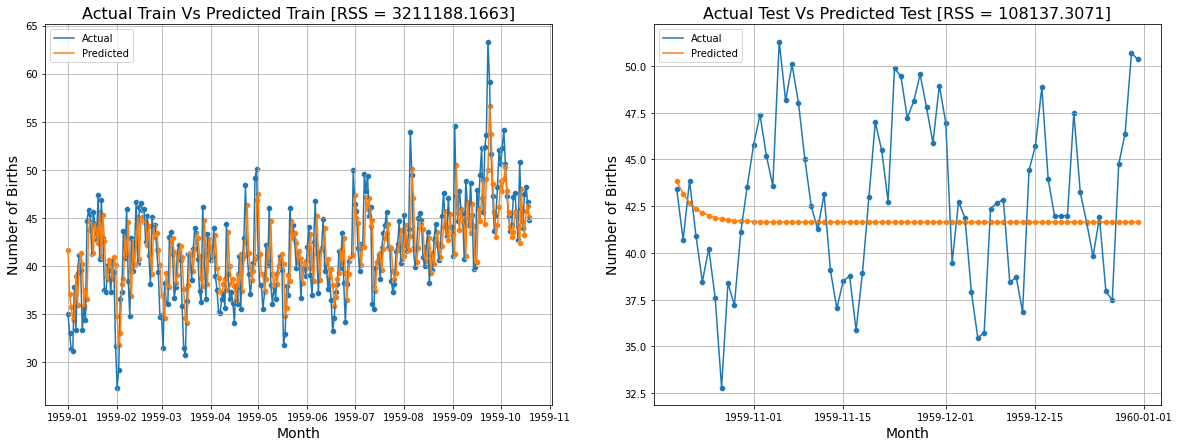

In [72]:
figure = plt.figure(figsize=[20, 7])

plt.subplot(1, 2, 1)
actual_vs_predicted(train, model_fit.fittedvalues, title='Actual Train Vs Predicted Train')

plt.subplot(1, 2, 2)
actual_vs_predicted(test, predicted, title='Actual Test Vs Predicted Test')

plt.show()

In [73]:
#MA
model = ARIMA(train, order=(0, 0, 1)) # p=0, d=0, q=1
model_fit = model.fit()
predicted = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)
print('-----------------------------------------------------------------------')
print('Coefficients:')
print(model_fit.params)
print('-----------------------------------------------------------------------')

-----------------------------------------------------------------------
Coefficients:
const    41.68051
ma.L1     0.55447
sigma2   16.55931
dtype: float64
-----------------------------------------------------------------------


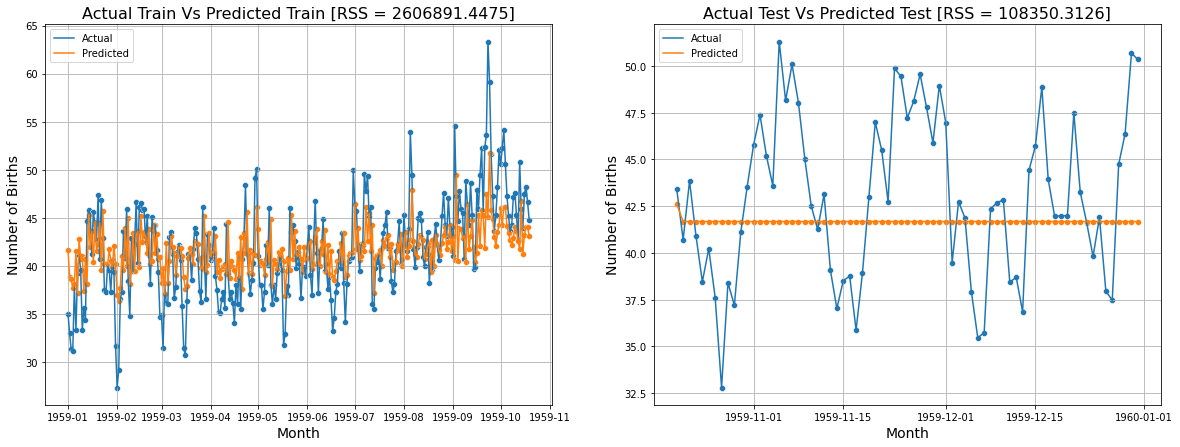

In [74]:
figure = plt.figure(figsize=[20, 7])

plt.subplot(1, 2, 1)
actual_vs_predicted(train, model_fit.fittedvalues, title='Actual Train Vs Predicted Train')

plt.subplot(1, 2, 2)
actual_vs_predicted(test, predicted, title='Actual Test Vs Predicted Test')

plt.show()

In [75]:
#ARIMA
model = ARIMA(train, order=(1, 1, 1)) # p=1, d=1, q=1
model_fit = model.fit()
predicted = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)
print('-----------------------------------------------------------------------')
print('Coefficients:')
print(model_fit.params)
print('-----------------------------------------------------------------------')

-----------------------------------------------------------------------
Coefficients:
ar.L1     0.55158
ma.L1    -0.95739
sigma2   12.73028
dtype: float64
-----------------------------------------------------------------------


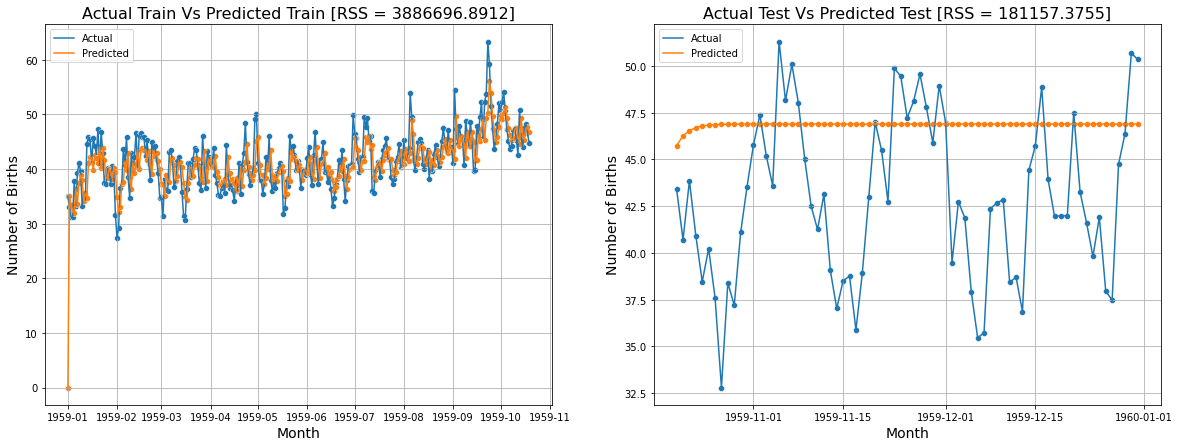

In [76]:
figure = plt.figure(figsize=[20, 7])

plt.subplot(1, 2, 1)
actual_vs_predicted(train, model_fit.fittedvalues, title='Actual Train Vs Predicted Train')

plt.subplot(1, 2, 2)
actual_vs_predicted(test, predicted, title='Actual Test Vs Predicted Test')

plt.show()

In [78]:
# Training ARIMA with completed shift transformed data
model = ARIMA(exp_weighted_avg_indexed_data, order=(1, 0, 1))
model_fit = model.fit()

# Display the shape of fitted values
print('Fitted Values Shape:', model_fit.fittedvalues.shape)

# Display the top 5 fitted values
model_fit.fittedvalues.head()

Fitted Values Shape: (365,)


Date
1959-01-01   41.94544
1959-01-02   37.09101
1959-01-03   35.67287
1959-01-04   34.45056
1959-01-05   34.29599
dtype: float64

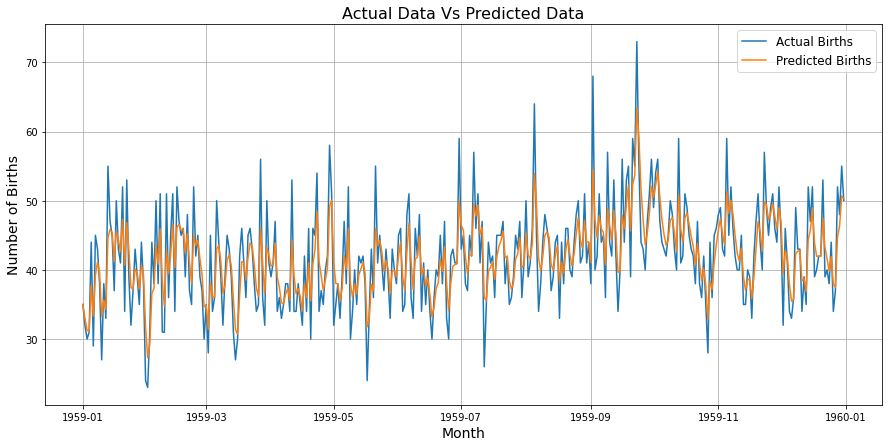

In [82]:
figure = plt.figure(figsize = [15, 7])

sns.lineplot(x = indexed_data.index, y = 'Births', data = indexed_data)
sns.lineplot(x = exp_weighted_avg_indexed_data.index, y = 'Births', data = exp_weighted_avg_indexed_data)
plt.xlabel('Month', size = 14)
plt.ylabel('Number of Births', size = 14)
plt.title(label = 'Actual Data Vs Predicted Data', size = 16)
plt.legend(labels = ['Actual Births', 'Predicted Births'], prop = {'size': 12})
plt.grid(b = True, which = 'both')
plt.show()